In [366]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [367]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/teams (1).csv")

In [368]:
df

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
...,...,...,...,...,...,...,...,...,...
2009,ZIM,2000,26,19,25.0,179.0,71.1,0.0,0
2010,ZIM,2004,14,11,25.1,177.8,70.5,0.0,3
2011,ZIM,2008,16,15,26.1,171.9,63.7,3.0,4
2012,ZIM,2012,9,8,27.3,174.4,65.2,4.0,0


In [369]:
df.isna().sum()

team           0
year           0
athletes       0
events         0
age            0
height         0
weight         0
prev_medals    0
medals         0
dtype: int64

In [370]:
df.duplicated().sum()

0

In [371]:
df.corr()

,year,athletes,events,age,height,weight,prev_medals,medals
year,1.000000,-0.078059,-0.039492,-0.013355,-0.011517,0.024624,-0.017917,-0.034870
athletes,-0.078059,1.000000,0.976563,0.035079,0.188917,0.108703,0.810576,0.839909
events,-0.039492,0.976563,1.000000,0.053747,0.211017,0.125992,0.752264,0.770646
age,-0.013355,0.035079,0.053747,1.000000,0.173711,0.213656,0.032596,0.023231
height,-0.011517,0.188917,0.211017,0.173711,1.000000,0.685961,0.138682,0.141946
weight,0.024624,0.108703,0.125992,0.213656,0.685961,1.000000,0.088706,0.089701
prev_medals,-0.017917,0.810576,0.752264,0.032596,0.138682,0.088706,1.000000,0.920048
medals,-0.034870,0.839909,0.770646,0.023231,0.141946,0.089701,0.920048,1.000000


In [ ]:
for i in range(0,len(df)):
  print(df['height'])

In [374]:
df

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
...,...,...,...,...,...,...,...,...,...
2009,ZIM,2000,26,19,25.0,179.0,71.1,0.0,0
2010,ZIM,2004,14,11,25.1,177.8,70.5,0.0,3
2011,ZIM,2008,16,15,26.1,171.9,63.7,3.0,4
2012,ZIM,2012,9,8,27.3,174.4,65.2,4.0,0


In [375]:
X

,team,year,athletes,events,age,height,weight,prev_medals
0,0,1964,8,8,22.0,161.0,64.2,0.0
1,0,1968,5,5,23.2,170.2,70.0,0.0
2,0,1972,8,8,29.0,168.3,63.8,0.0
3,0,1980,11,11,23.6,168.4,63.2,0.0
4,0,2004,5,5,18.6,170.8,64.8,0.0
...,...,...,...,...,...,...,...,...
2009,213,2000,26,19,25.0,179.0,71.1,0.0
2010,213,2004,14,11,25.1,177.8,70.5,0.0
2011,213,2008,16,15,26.1,171.9,63.7,3.0
2012,213,2012,9,8,27.3,174.4,65.2,4.0


In [376]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2009    0
2010    3
2011    4
2012    0
2013    0
Name: medals, Length: 2014, dtype: int64

In [377]:
print(df.dtypes)

team            object
year             int64
athletes         int64
events           int64
age            float64
height         float64
weight         float64
prev_medals    float64
medals           int64
dtype: object


In [378]:
print(df['team'].unique())

['AFG' 'AHO' 'ALB' 'ALG' 'AND' 'ANG' 'ANT' 'ARG' 'ARM' 'ARU' 'ASA' 'AUS'
 'AUT' 'AZE' 'BAH' 'BAN' 'BAR' 'BDI' 'BEL' 'BEN' 'BER' 'BHU' 'BIH' 'BIZ'
 'BLR' 'BOL' 'BOT' 'BRA' 'BRN' 'BRU' 'BUL' 'BUR' 'CAF' 'CAM' 'CAN' 'CAY'
 'CGO' 'CHA' 'CHI' 'CHN' 'CIV' 'CMR' 'COD' 'COK' 'COL' 'COM' 'CPV' 'CRC'
 'CRO' 'CUB' 'CYP' 'CZE' 'DEN' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'ERI' 'ESA'
 'ESP' 'EST' 'ETH' 'FIJ' 'FIN' 'FRA' 'FRG' 'FSM' 'GAB' 'GAM' 'GBR' 'GBS'
 'GDR' 'GEO' 'GEQ' 'GER' 'GHA' 'GRE' 'GRN' 'GUA' 'GUI' 'GUM' 'GUY' 'HAI'
 'HKG' 'HON' 'HUN' 'INA' 'IND' 'IOA' 'IRI' 'IRL' 'IRQ' 'ISL' 'ISR' 'ISV'
 'ITA' 'IVB' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KIR' 'KOR' 'KSA' 'KUW'
 'LAO' 'LAT' 'LBA' 'LBR' 'LCA' 'LES' 'LIB' 'LIE' 'LTU' 'LUX' 'MAD' 'MAR'
 'MAS' 'MAW' 'MDA' 'MDV' 'MEX' 'MGL' 'MHL' 'MKD' 'MLI' 'MLT' 'MNE' 'MON'
 'MOZ' 'MRI' 'MTN' 'MYA' 'NAM' 'NCA' 'NED' 'NEP' 'NGR' 'NIG' 'NOR' 'NRU'
 'NZL' 'OMA' 'PAK' 'PAN' 'PAR' 'PER' 'PHI' 'PLE' 'PLW' 'PNG' 'POL' 'POR'
 'PRK' 'PUR' 'QAT' 'ROU' 'RSA' 'RUS' 'RWA' 'SAM' 'S

In [379]:
label = preprocessing.LabelEncoder()
X['team'] = label.fit_transform(X['team'])
X['team'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [380]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.1, random_state=1)

In [381]:
X_train

,team,year,athletes,events,age,height,weight,prev_medals
675,71,2000,3,3,26.3,165.5,57.5,0.0
1695,177,2008,9,8,22.2,171.8,61.0,0.0
1733,181,1984,254,138,24.2,179.8,74.2,20.0
634,65,2008,448,205,26.4,177.0,69.9,53.0
1656,172,2004,2,2,21.5,166.0,64.0,0.0
...,...,...,...,...,...,...,...,...
1791,187,1984,40,25,27.8,167.5,59.3,1.0
1096,114,1972,36,23,24.7,174.3,73.3,0.0
1932,202,2016,719,245,26.4,178.0,73.8,248.0
235,25,1984,13,11,28.6,169.9,63.5,0.0


In [382]:
Y_train

675       0
1695      1
1733     34
634      77
1656      0
       ... 
1791      1
1096      1
1932    264
235       0
1061      3
Name: medals, Length: 1812, dtype: int64

In [383]:
X_test

,team,year,athletes,events,age,height,weight,prev_medals
309,33,2004,4,4,20.2,165.5,60.2,0.0
285,30,2000,150,85,25.4,172.9,68.7,21.0
919,94,2012,56,41,24.5,173.3,66.5,1.0
120,12,2008,93,62,27.3,178.0,70.2,8.0
585,61,2012,36,30,27.3,183.0,85.0,3.0
...,...,...,...,...,...,...,...,...
275,29,2012,3,3,18.7,168.0,59.0,0.0
400,41,2004,19,15,24.2,174.2,72.1,18.0
972,99,2000,8,8,24.1,170.8,66.0,0.0
1638,170,2008,73,60,26.5,179.5,74.5,5.0


In [384]:
Y_test

309      0
285     13
919      0
120      3
585      2
        ..
275      0
400      1
972      0
1638     5
1330    45
Name: medals, Length: 202, dtype: int64

In [385]:
x_mean = X_train.mean()
x_std = X_train.std()

In [386]:
X2 = (X_train - x_mean) / x_std

In [387]:
X2.describe()

,team,year,athletes,events,age,height,weight,prev_medals
count,1.812000e+03,1.812000e+03,1.812000e+03,1.812000e+03,1.812000e+03,1.812000e+03,1.812000e+03,1.812000e+03
mean,-3.529186e-17,-2.837073e-15,4.901647e-18,2.156725e-17,-1.855764e-15,-3.525264e-15,5.009483e-16,4.705581e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.719927e+00,-2.037591e+00,-5.778152e-01,-7.138392e-01,-2.799541e+00,-4.323812e+00,-3.482549e+00,-3.186756e-01
25%,-8.626971e-01,-7.292584e-01,-5.309943e-01,-6.127184e-01,-5.456768e-01,-6.336718e-01,-6.133751e-01,-3.186756e-01
50%,-3.843813e-02,5.574133e-02,-4.217456e-01,-4.509251e-01,-4.481824e-02,8.739010e-02,1.790989e-02,-3.186756e-01
75%,8.352764e-01,8.407411e-01,-2.376789e-02,1.962480e-01,4.918160e-01,6.340776e-01,5.523311e-01,-1.912897e-01
max,1.791417e+00,1.364074e+00,5.961504e+00,4.726460e+00,1.473051e+01,3.593730e+00,1.050593e+01,1.375746e+01


In [388]:
X2.insert(0,'intercept',1)

In [389]:
X2.T

,675,1695,1733,634,1656,525,1743,396,1166,75,...,960,847,1669,715,905,1791,1096,1932,235,1061
intercept,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
team,-0.549479,1.197950,1.263891,-0.648390,1.115524,-0.813242,1.280376,-1.044034,0.258295,-1.604530,...,-0.104379,-0.269231,1.164980,-0.467053,-0.186805,1.362802,0.159384,1.610080,-1.307797,0.076958
year,0.317408,0.840741,-0.729258,0.840741,0.579074,1.102408,-0.467592,-0.467592,-1.252592,1.102408,...,-0.467592,0.055741,-2.037591,1.102408,0.840741,-0.729258,-1.514258,1.364074,-0.729258,1.102408
athletes,-0.562208,-0.515387,1.396466,2.910342,-0.570012,-0.304693,-0.468566,-0.421746,-0.390532,0.569297,...,-0.203248,-0.164231,-0.530994,-0.530994,-0.343711,-0.273479,-0.304693,5.025086,-0.484173,-0.195445
events,-0.673391,-0.572270,2.056871,3.411890,-0.693615,-0.309356,-0.511598,-0.309356,-0.552046,0.600731,...,-0.289132,-0.107114,-0.612718,-0.592494,-0.370028,-0.228459,-0.268908,4.220856,-0.511598,0.034455
age,0.527592,-0.939209,-0.223696,0.563367,-1.189638,-0.116369,-0.044818,-0.509901,0.134060,0.921123,...,-0.295248,-0.080594,0.420265,-0.760331,0.134060,1.064226,-0.044818,0.563367,1.350431,0.527592
height,-1.590375,-0.402743,1.105360,0.577524,-1.496118,0.125093,-1.269903,-0.082272,-0.327338,1.143062,...,0.445565,-0.402743,-0.685513,-0.704364,2.443802,-1.213349,0.068539,0.766037,-0.760918,1.331575
weight,-1.585354,-1.117735,0.645855,0.071352,-0.716919,-0.690198,0.071352,1.247079,-1.010851,1.206997,...,-0.088974,-0.316103,-1.531912,-0.583314,2.088792,-1.344864,0.525610,0.592413,-0.783722,1.126834
prev_medals,-0.318676,-0.318676,0.318254,1.369187,-0.318676,-0.254983,-0.318676,-0.286829,-0.318676,1.305494,...,-0.095750,-0.318676,-0.318676,-0.318676,-0.318676,-0.286829,-0.318676,7.579249,-0.318676,-0.223136


In [390]:
class RidgeRegression:
  def __init__(self, learningRate):
    self.learningRate = learningRate
    

  def fit(self,Xtrain,Ytrain):
    X_train = Xtrain 
    Y_train = Ytrain
    alpha = self.learningRate

    x_mean = X_train.mean()
    x_std = X_train.std()

    X2 = (X_train - x_mean) / x_std
    X2.insert(0,'intercept',1)

    identity = np.identity(9)
    identity[0,0] = 0
    penalty1 = identity * alpha

    global res
    res = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2) + penalty1), X2.T),Y_train)
    return res

  def predict(self,Xtest):
    X_test = Xtest
 
    x_mean = X_test.mean()
    x_std = X_test.std()

    X3 = (X_test - x_mean) / x_std
    X3.insert(0,'intercept',1)

    y_pred = np.dot(X3, res)

    return y_pred

In [391]:
ridge = RidgeRegression(learningRate=10)

In [392]:
res = ridge.fit(X_train,Y_train)

10

In [393]:
ypred = ridge.predict(X_test)

In [407]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(np.sqrt(mean_squared_error(Y_test,ypred))) 
print(r2_score(Y_test, ypred))

11.088712816248368
0.8962255992648174


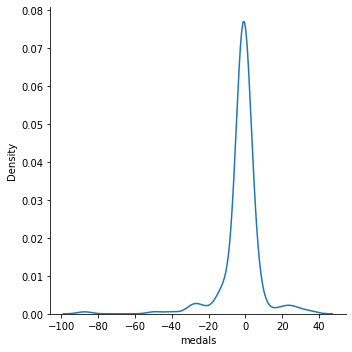

In [394]:
import seaborn as sns
sns.displot(ypred-Y_test,kind='kde')

In [395]:
from sklearn.linear_model import Ridge
RidgeRegressor = Ridge(alpha=10)

In [396]:
yfit = RidgeRegressor.fit(X_train,Y_train)
yfit

Ridge(alpha=10)

In [397]:
yp = RidgeRegressor.predict(X_test)

In [398]:
yp

array([-1.05783471e+00,  1.63240092e+01, -6.23731330e-01,  3.78398316e+00,
        9.13678206e-01,  8.64494254e+00,  4.09307466e+00, -8.33313643e-01,
        1.23012583e+00,  2.05847705e+00,  3.96235071e+00,  6.35616706e+01,
        6.39811006e+01,  6.17934763e+00,  5.36333563e+01,  2.11853762e+02,
       -1.07915352e+00, -2.41116086e-01,  1.26254037e+00,  3.22046603e-01,
        6.45012833e+00,  3.19065944e+00,  2.32526207e+00, -3.63060985e-01,
        9.57647448e+00,  8.95172467e+00, -1.61253847e+00,  1.81158893e+00,
        9.49789157e-01, -1.55216166e+00, -2.14089593e-01, -6.23224360e-01,
        6.50672760e-01, -2.44900760e+00,  9.39114240e+01, -9.37956125e-01,
        5.07712640e+01, -4.17711509e+00, -2.61129219e+00,  2.39048694e-01,
       -3.06703550e-01, -1.14758563e+00,  1.17176029e+00,  1.79446664e+00,
        3.88122259e+01, -5.86035252e-01,  7.96654313e-01,  1.61656255e+00,
       -1.21546591e+00, -1.30761368e+00,  5.93869463e-01, -2.84566500e+00,
        4.86425060e-01, -

In [408]:
print(np.sqrt(mean_squared_error(Y_test,yp))) 
print(r2_score(Y_test, yp))

11.202166634121408
0.8940912067926081
